Importing Required Libraries and Packages

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from skimage import feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc, log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle

Extracting HOG Features

In [53]:
# Function to extract HOG features from an image and visualize it
def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

Loading The Fruit360 Dataset

In [54]:
# Function to load and preprocess image dataset
def load_and_preprocess_data(root_folder):
    class_labels = []
    images = []
    labels = []

    # Iterate through each class in the dataset
    for label in os.listdir(root_folder):
        class_path = os.path.join(root_folder, label)

        if os.path.isdir(class_path):
            class_labels.append(label)

            # Load and preprocess each image in the class
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)  # Load image using OpenCV
                img = cv2.resize(img, (128, 64))  # Resize to a common size
                hog_features, hog_image = extract_hog_features(img) # Extract HOG features and visualize
                # Display the original and HOG images side by side
                # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
                # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)
                # ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                # ax1.set_title('Original Image')
                # ax1.axis('off')
                # ax2.imshow(hog_image, cmap='gray')
                # ax2.set_title('HOG Features')
                # ax2.axis('off')
                # plt.show()
                # Append HOG features to the features list
                images.append(hog_features)
                # Append the label to the labels list
                labels.append(label)

    return np.array(images), np.array(labels), class_labels

Loading and Preprocessing Data

In [55]:
# Load and preprocess data
root_folder = 'Images'  # Replace with the path to your dataset
X, y, class_labels = load_and_preprocess_data(root_folder)

Converting Class Names Into Numeric Labels

In [56]:
# Use LabelEncoder to convert class names into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Class Labels Converting Class Names Into Numeric Labels
class_labels_encoded = label_encoder.fit_transform(class_labels)
print(class_labels_encoded)

[0 1 2 3 4]


Exploring The Dataset

In [57]:
df = pd.DataFrame(X)
df['Label'] = y
df = shuffle(df).reset_index(drop=True)

X = df.drop(['Label'], axis=1)
y = df['Label']

df.head()

,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009076,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.001780,0.0,0.000000,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.003111,0.0,0.008799,0.0,0.015555,0.0,0.002200,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.012876,0.0,0.036420,0.0,0.045067,0.0,0.009105,0.0,0.0,4


Splitting The Dataset Into Training and Validation and Testing

In [58]:
# Split the dataset into training and validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Standardizing Features

In [59]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Using Logistic Regression AS A Model

In [60]:
# Logistic Regression

# Initialize and train logistic regression model
logreg = LogisticRegression()

In [61]:
# Lists to store loss values during training
train_loss_values = []
val_loss_values = []

# Training the model
num_epochs = 10  # You can adjust the number of epochs
for epoch in range(num_epochs):
    # Fit the model to the training data
    logreg.fit(X_train, y_train)

    # Calculate training loss
    y_train_pred_prob = logreg.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_pred_prob)
    train_loss_values.append(train_loss)

    # Calculate validation loss
    y_val_pred_prob = logreg.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_pred_prob)
    val_loss_values.append(val_loss)

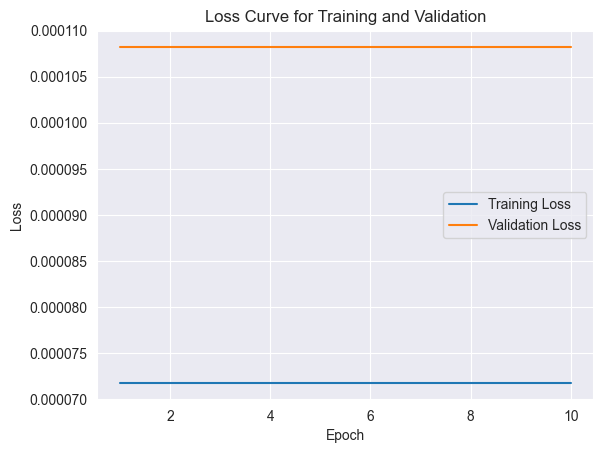

In [62]:
# Plotting the loss curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_loss_values, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_values, label='Validation Loss')
plt.title('Loss Curve for Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# Predictions on the test set
y_test_pred = logreg.predict(X_test)
y_test_pred_prob = logreg.predict_proba(X_test)

In [64]:
# Calculate metrics for the test set
accuracy_logreg_test = accuracy_score(y_test, y_test_pred)
conf_matrix_logreg_test = confusion_matrix(y_test, y_test_pred)
roc_auc_logreg_test = roc_auc_score(y_test, y_test_pred_prob, multi_class='ovr')

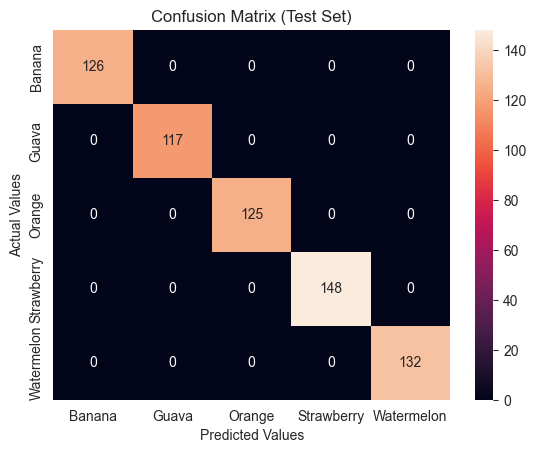

In [65]:
# Visualize the confusion matrix for the test set
plt.figure()
sns.heatmap(conf_matrix_logreg_test, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix (Test Set)')
plt.show()

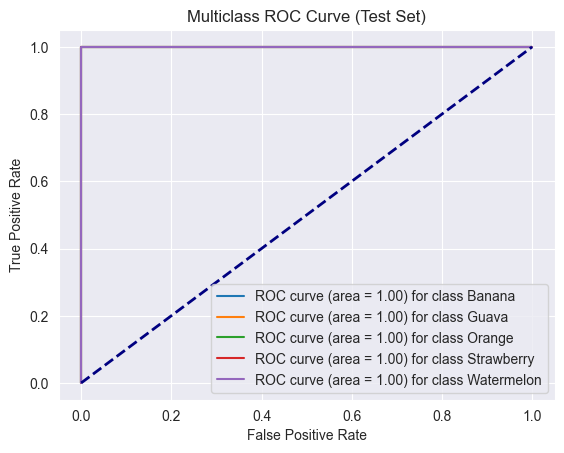

In [66]:
# Plot ROC curve for the test set
plt.figure()
fpr_test = {}
tpr_test = {}
thresh_test = {}
roc_auc_test = {}

for i in range(len(class_labels)):
    fpr_test[i], tpr_test[i], thresh_test[i] = roc_curve(y_test == class_labels_encoded[i], y_test_pred_prob[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve (area = {roc_auc_test[i]:.2f}) for class {class_labels[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

In [67]:
# Print results for the test set
print("Test Set - Logistic Regression Accuracy:", accuracy_logreg_test)
print("Test Set - Logistic Regression ROC AUC:", roc_auc_logreg_test)
print(classification_report(y_test, y_test_pred, target_names=class_labels))

Test Set - Logistic Regression Accuracy: 1.0
Test Set - Logistic Regression ROC AUC: 1.0
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00       126
       Guava       1.00      1.00      1.00       117
      Orange       1.00      1.00      1.00       125
  Strawberry       1.00      1.00      1.00       148
  Watermelon       1.00      1.00      1.00       132

    accuracy                           1.00       648
   macro avg       1.00      1.00      1.00       648
weighted avg       1.00      1.00      1.00       648


In [68]:
def preprocess_new_image(new_image_path, scaler):
    new_img = cv2.imread(new_image_path)
    new_img = cv2.resize(new_img, (128, 64))
    new_hog_features, _ = extract_hog_features(new_img)
    new_img_features = scaler.transform([new_hog_features])
    return new_img_features


# Preprocess the new image
new_img_features = preprocess_new_image('4_100.jpg', scaler)

# Make prediction
predicted_class_encoded = logreg.predict(new_img_features)

# Map predicted class to fruit name
predicted_class_name = label_encoder.inverse_transform(predicted_class_encoded)[0]

print(f"The predicted fruit for the new image is: {predicted_class_name}")

The predicted fruit for the new image is: Orange
